# Predicting the Sale Price of a House in Ames, Iowa

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')

In [2]:
path = '../datasets/'
file_name = 'cleaned_train.csv'
houses = pd.read_csv(path + file_name)

Review the distrubutions of the numerical features:

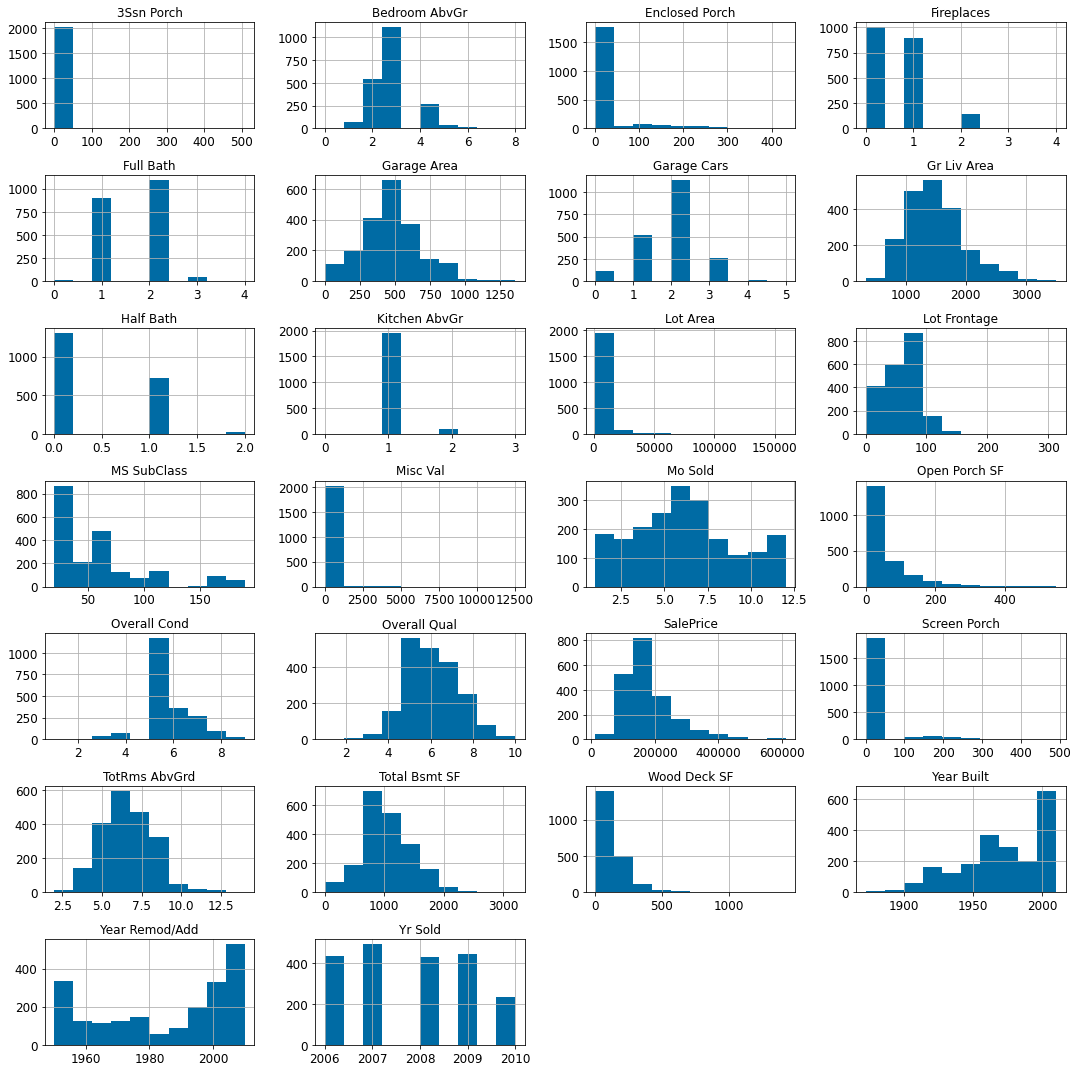

In [3]:
houses.hist(figsize=(15,15), xlabelsize=12, ylabelsize=12, layout=(7, 4))
plt.tight_layout();

Positive linear relationship for these house features and Sale Price:

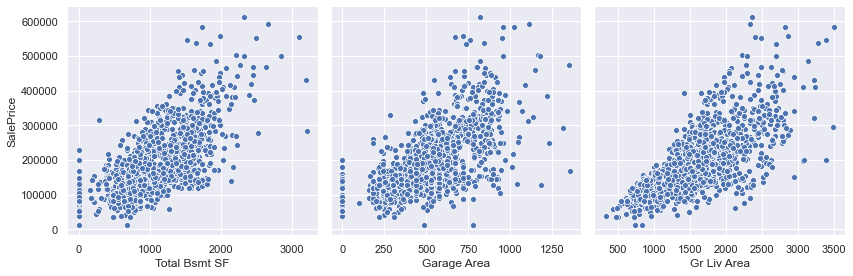

In [20]:
sns.set(font_scale = 1)
sns.pairplot(houses,
             x_vars=['Total Bsmt SF', 'Garage Area', 'Gr Liv Area'],
             y_vars=['SalePrice'], height = 4);
plt.tight_layout();

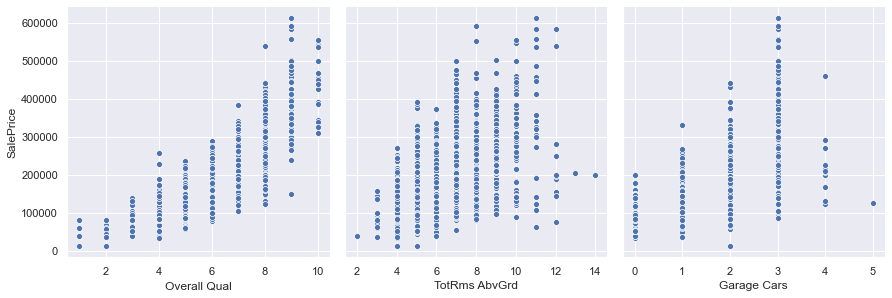

In [21]:
sns.pairplot(houses, 
             x_vars=['Overall Qual', 'TotRms AbvGrd','Garage Cars',], 
             y_vars=['SalePrice'], height = 4);

### Visualizations

The following graphs show Categorical and Numerical data plotted agains Sale Price to identify patterns and answer  some questions about the relevance of each feature and the target.

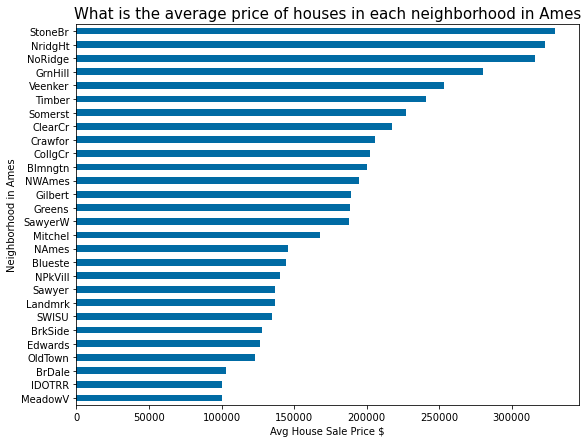

In [9]:
plt.figure(figsize=(9,7))
houses.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot.barh();
plt.title('Avg House Price per Neighborhood')
plt.ylabel('Neighborhood in Ames')
plt.xlabel('Avg House Sale Price $')
plt.title('What is the average price of houses in each neighborhood in Ames', fontsize = 15);

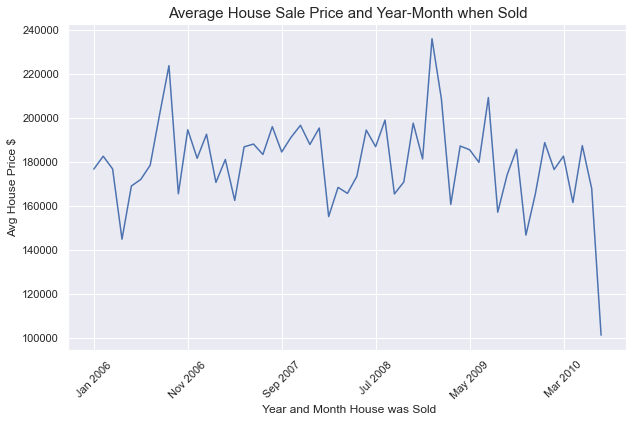

In [27]:
plt.figure(figsize=(10,6))
houses[['Mo Sold','Yr Sold', 'SalePrice']].groupby(['Yr Sold', 'Mo Sold'])['SalePrice'].mean().plot.line()
plt.ylabel('Avg House Price $');
plt.xlabel( ' Year and Month House was Sold')
plt.xticks([0, 10, 20, 30, 40, 50],('Jan 2006', 'Nov 2006', 'Sep 2007', 
                                    'Jul 2008', 'May 2009', 'Mar 2010'), rotation=45)
plt.title('Average House Sale Price and Year-Month when Sold', fontsize = 15);

In [61]:
def clean_date(df):
    return str(df['Mo Sold']) + '-' + str(df['Yr Sold'])
 
houses['date_sold'] = houses[['Mo Sold','Yr Sold']].apply(clean_date, axis=1)
houses['date_sold'] = pd.to_datetime(houses['date_sold'], format='%m-%Y')

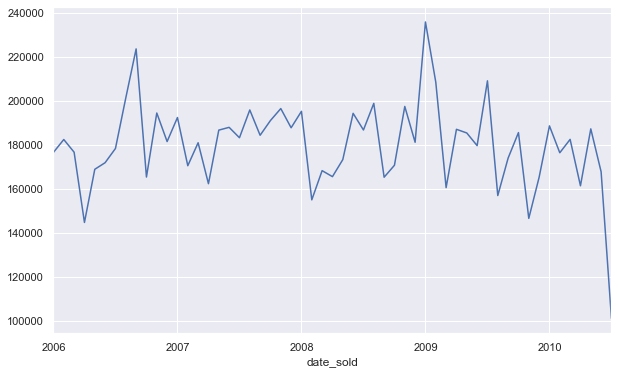

In [68]:
import matplotlib.dates as mdates
plt.figure(figsize = (10, 6))
date_sold = houses.groupby('date_sold')['SalePrice'].mean()
date_sold.sort_index().plot.line();


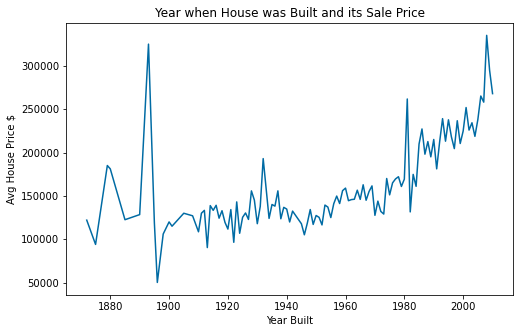

In [5]:
plt.figure(figsize = (8, 5))
yrbuilt = houses.groupby('Year Built')['SalePrice'].mean()
yrbuilt.sort_index().plot.line();
plt.ylabel('Avg House Price $')
plt.title('Year when House was Built and its Sale Price');

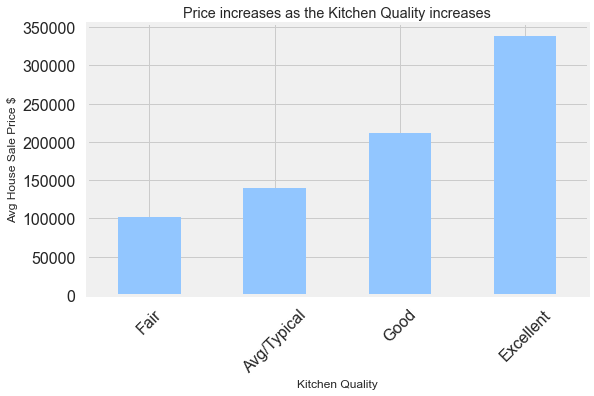

In [51]:
plt.figure(figsize=(8,5))
houses.groupby('Kitchen Qual')['SalePrice'].mean().sort_values().plot.bar();
plt.title('Price increases as the Kitchen Quality increases')
plt.xlabel('Kitchen Quality')
plt.ylabel('Avg House Sale Price $');
plt.xticks([0, 1, 2, 3],('Fair', 'Avg/Typical', 'Good', 'Excellent'), rotation=45);

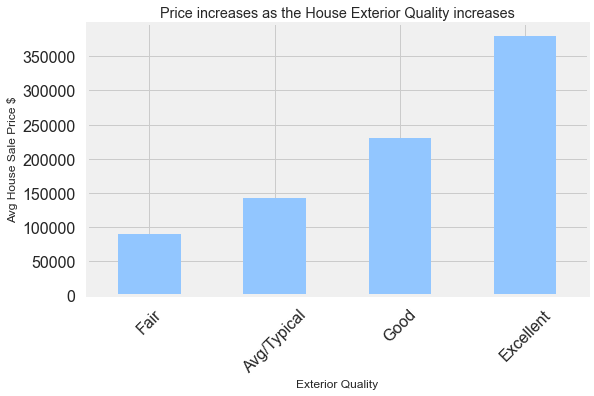

In [52]:
plt.figure(figsize=(8,5))
houses.groupby('Exter Qual')['SalePrice'].mean().sort_values().plot.bar();
plt.title('Price increases as the House Exterior Quality increases')
plt.xlabel('Exterior Quality')
plt.ylabel('Avg House Sale Price $');
plt.xticks([0, 1, 2, 3],('Fair', 'Avg/Typical', 'Good', 'Excellent'), rotation=45);

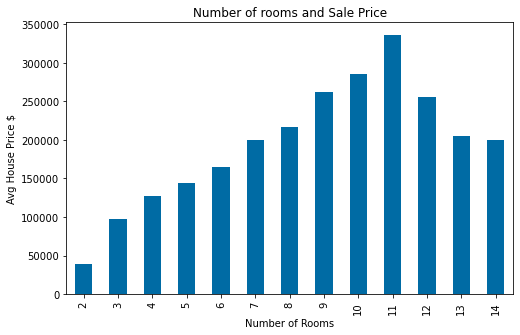

In [7]:
plt.figure(figsize = (8, 5))
houses.groupby('TotRms AbvGrd')['SalePrice'].mean().plot.bar();
plt.ylabel('Avg House Price $')
plt.xlabel('Number of Rooms')
plt.title('Number of rooms and Sale Price');